<a href="https://colab.research.google.com/github/dominiksakic/deeplearning00/blob/main/kerasFunctionalApiExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from tensorflow import keras
from keras import layers

vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,),name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags, ), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])


In [12]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])

model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)

model.evaluate([title_data, text_body_data, tags_data],
 [priority_data, department_data])

priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - department_accuracy: 0.2910 - department_loss: 39.0830 - loss: 39.3638 - priority_loss: 0.2808 - priority_mean_absolute_error: 0.4520
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - department_accuracy: 0.0734 - department_loss: 36.4074 - loss: 36.7368 - priority_loss: 0.3294 - priority_mean_absolute_error: 0.4989
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


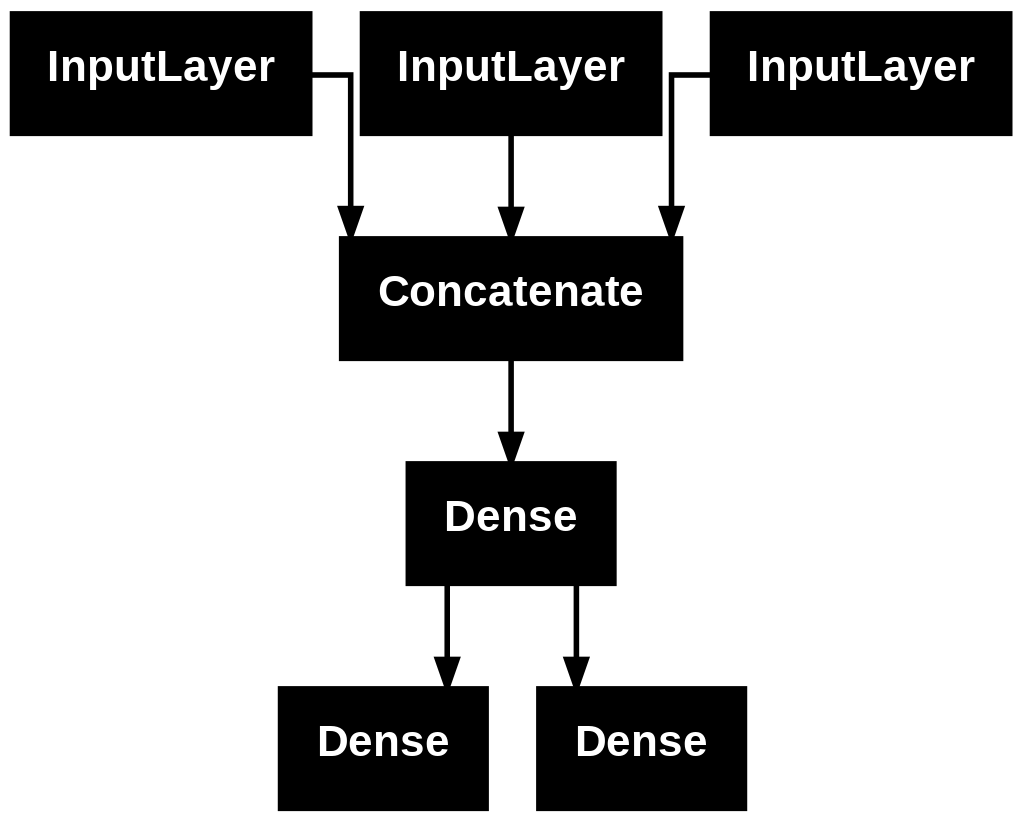

In [13]:
keras.utils.plot_model(model, "ticket_classifier.png")

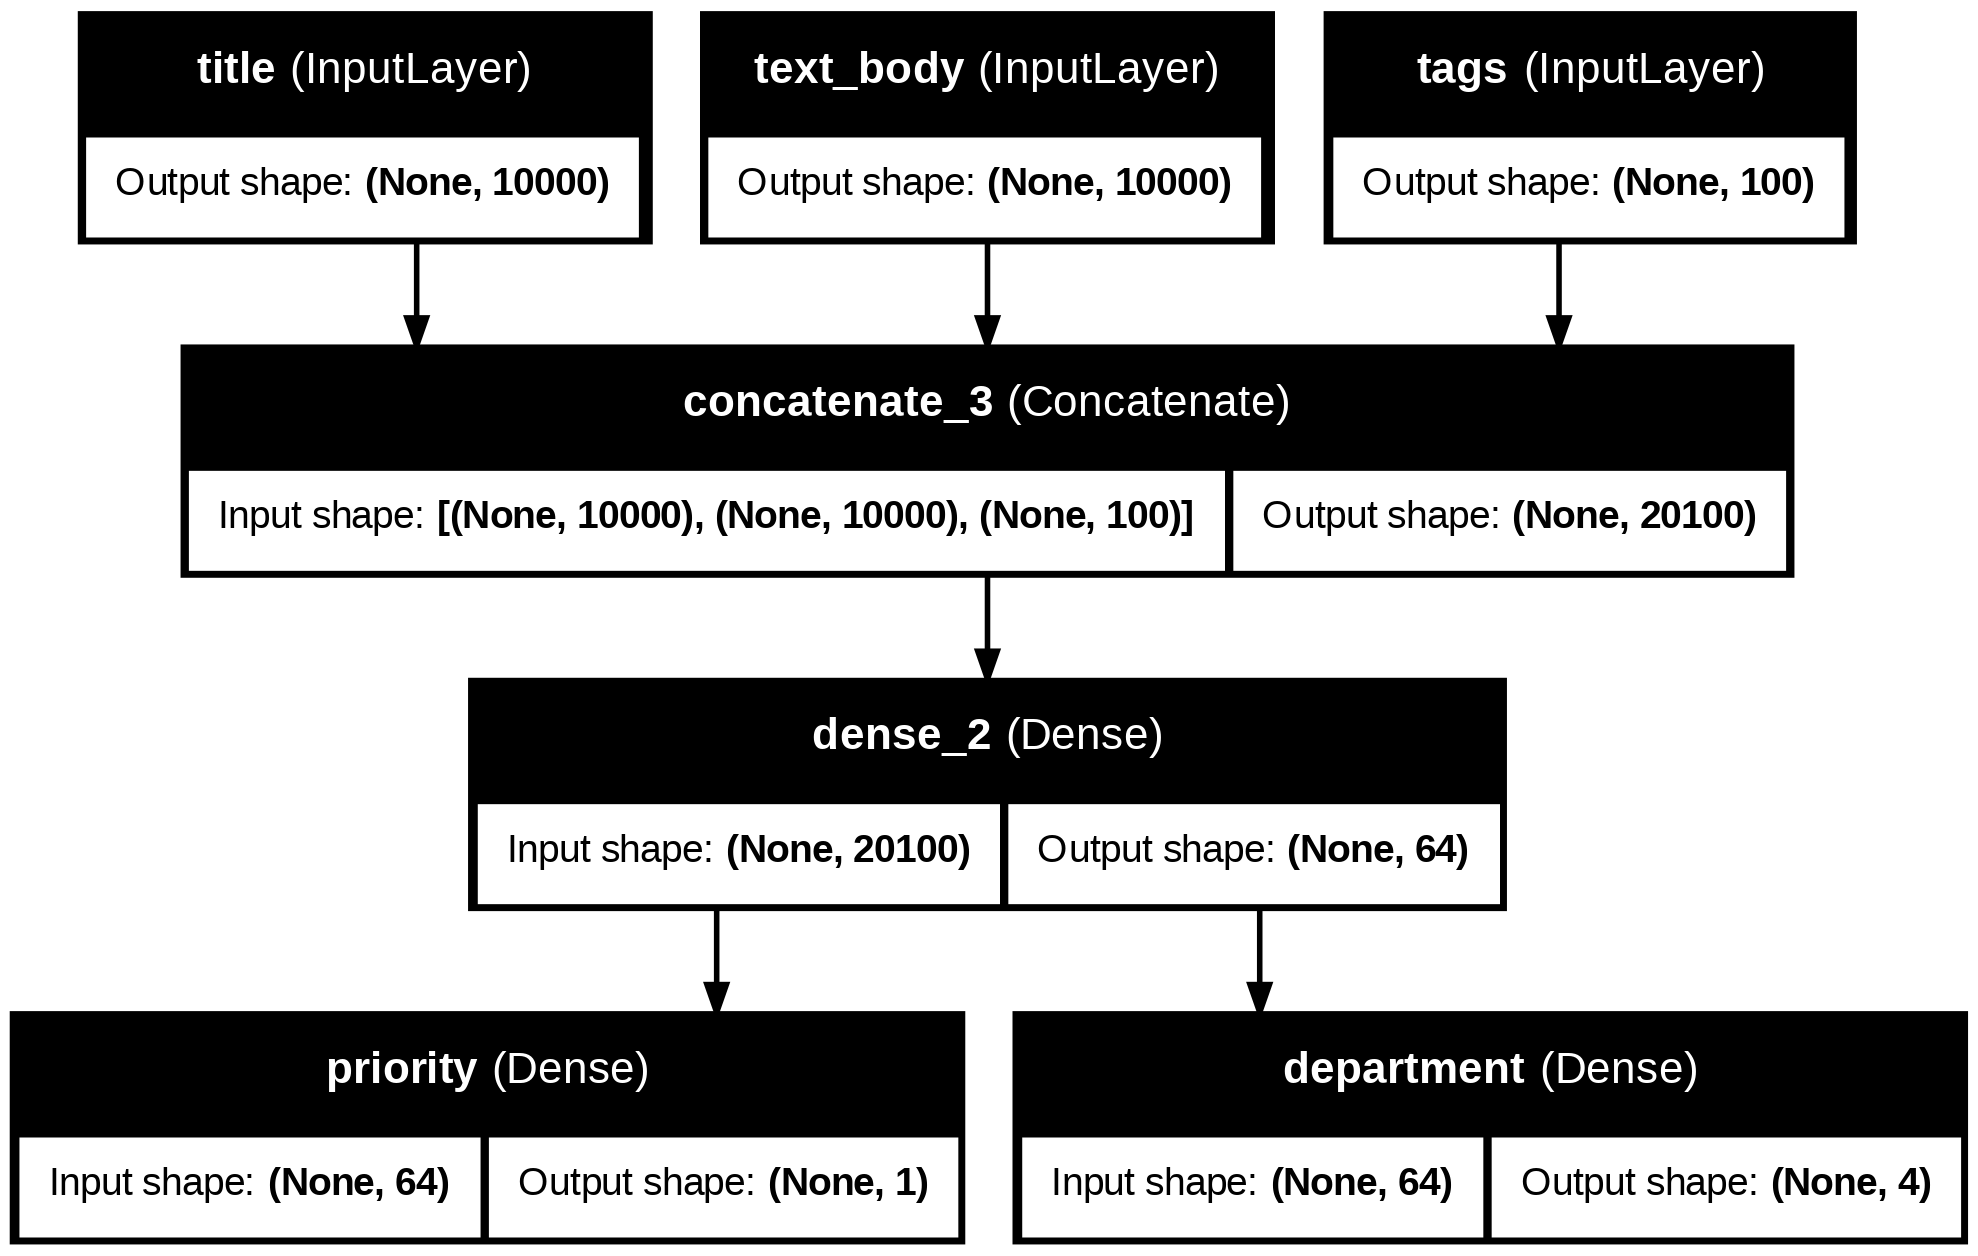

In [17]:
keras.utils.plot_model(model,
                       "ticket_classifier_with_shape_info.png",
                       show_shapes=True,
                       show_layer_names=True)

In [24]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate_3, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

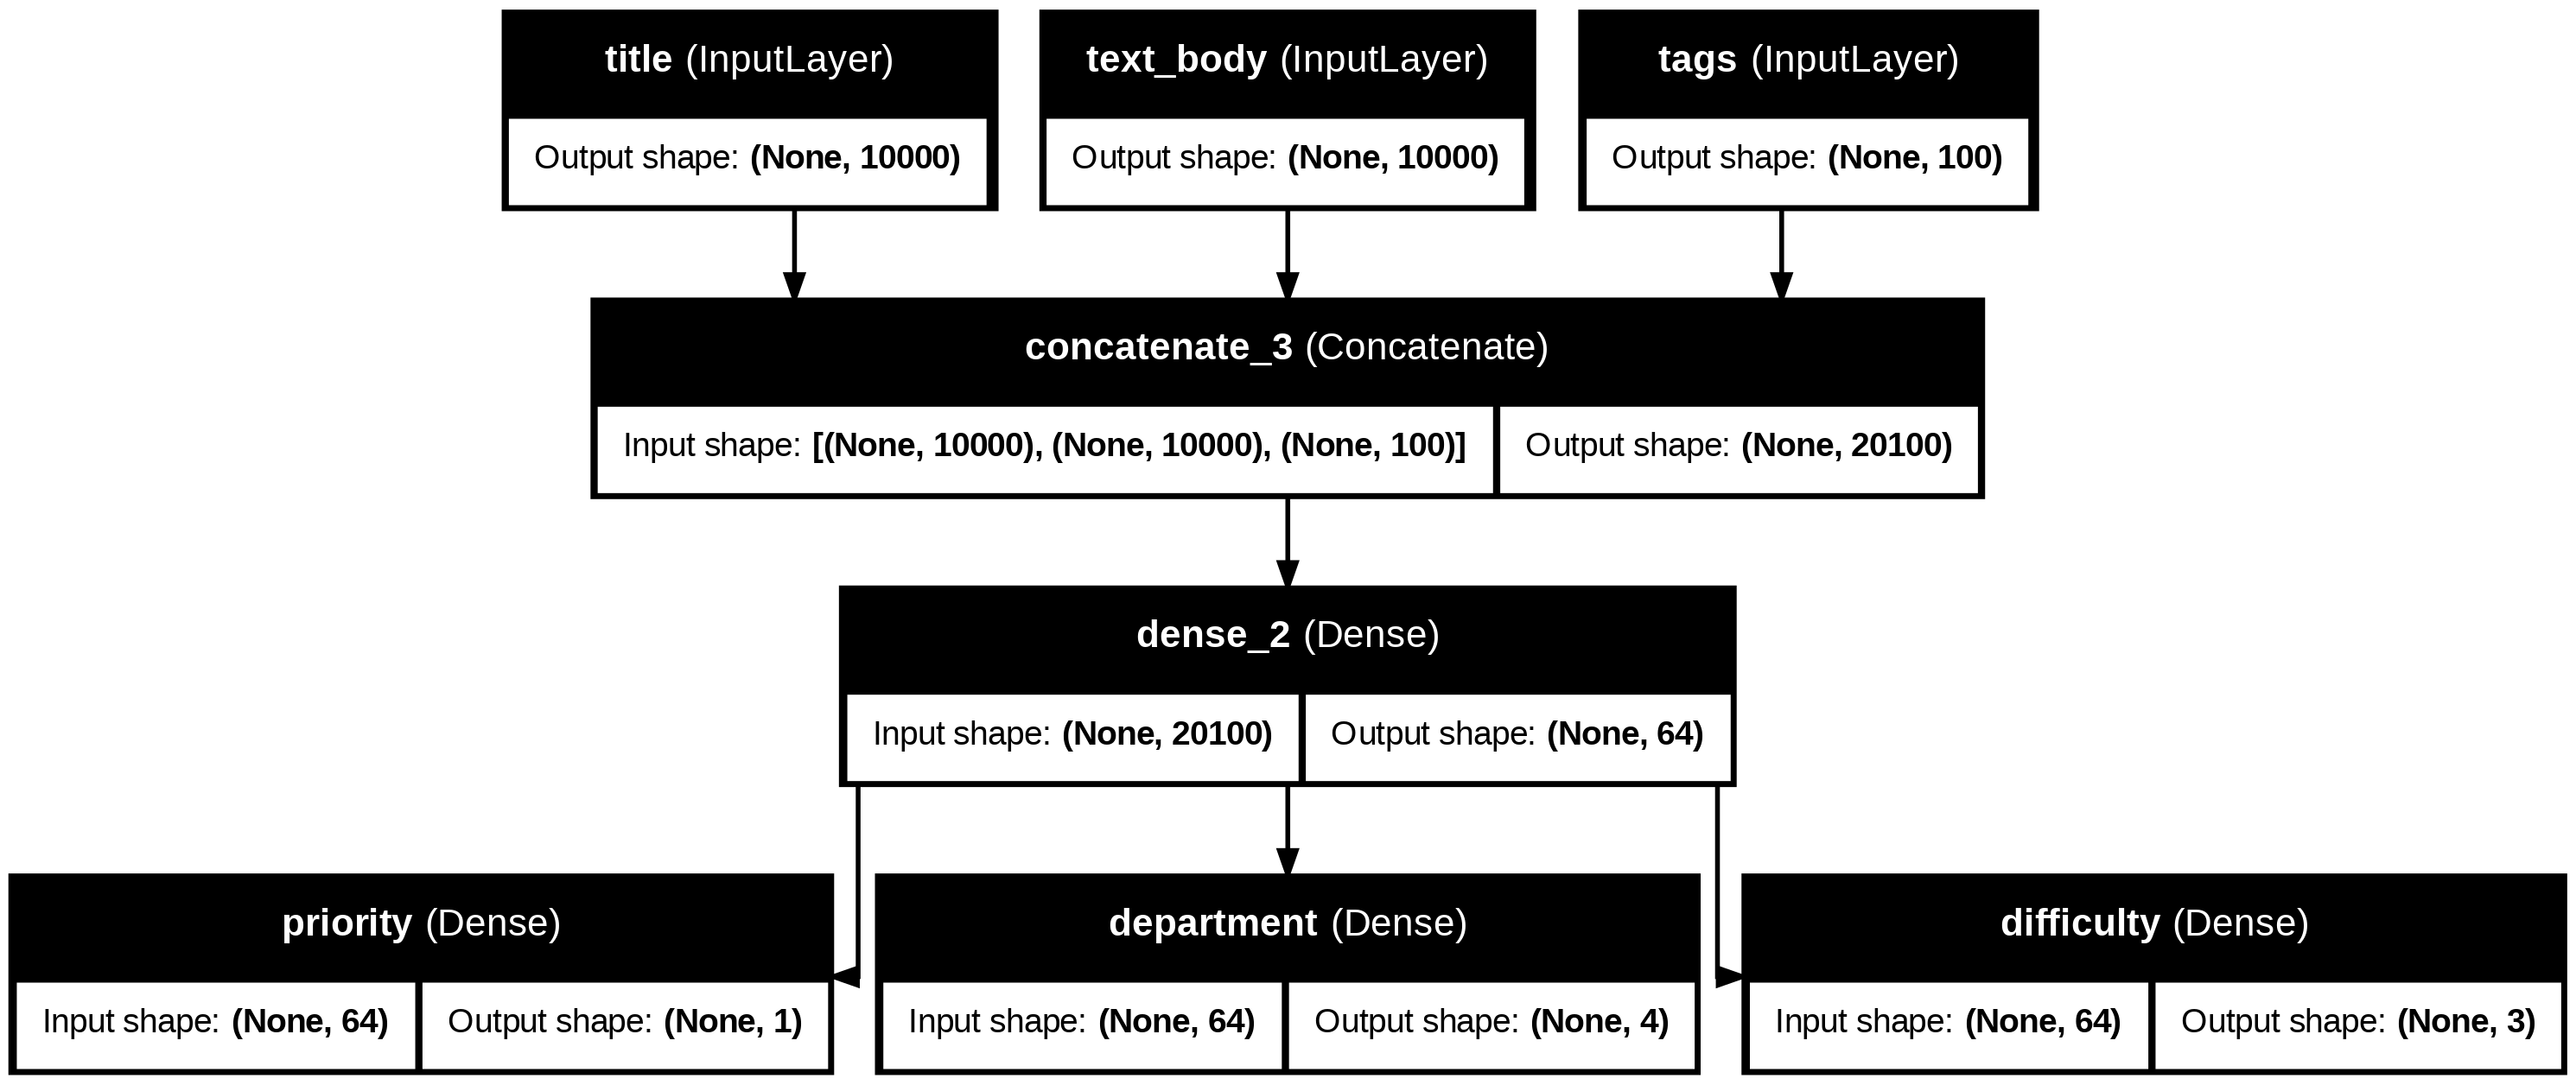

In [26]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

keras.utils.plot_model(new_model,
                       "updated_ticket_classifier.png",
                       show_shapes=True,
                       show_layer_names=True)

In [27]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate_3, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]